In [1]:
import random
from sklearn.neighbors import NearestNeighbors
import numpy as np

In [2]:
class Smote(object):
    """
    SMOTE algorithm implementation.
    Parameters
    ----------
    samples : {array-like}, shape = [n_samples, n_features]
        Training vector, where n_samples in the number of samples and
        n_features is the number of features.
    N : int, optional (default = 50)
        Parameter N, the percentage of n_samples, affects the amount of final 
        synthetic samples，which calculated by floor(N/100)*T.
    k : int, optional (default = 5)
        Specify the number for NearestNeighbors algorithms.
        knn参数
    r : int, optional (default = 2)
        Parameter for sklearn.neighbors.NearestNeighbors API.When r = 1, this 
        is equivalent to using manhattan_distance (l1), and euclidean_distance 
        (l2) for r = 2. For arbitrary p, minkowski_distance (l_r) is used.
    Examples
    --------
      >>> samples = np.array([[3,1,2], [4,3,3], [1,3,4],
                              [3,3,2], [2,2,1], [1,4,3]])
      >>> smote = Smote(N=200)
      >>> synthetic_points = smote.fit(samples)
      >>> print(synthetic_points)
      [[3.31266454 1.62532908 2.31266454]
       [2.4178394  1.5821606  2.5821606 ]
       [3.354422   2.677211   2.354422  ]
       [2.4169074  2.2084537  1.4169074 ]
       [1.86018171 2.13981829 3.13981829]
       [3.68440949 3.         3.10519684]
       [2.22247957 3.         2.77752043]
       [2.3339721  2.3339721  1.3339721 ]
       [3.31504371 2.65752185 2.31504371]
       [2.54247589 2.54247589 1.54247589]
       [1.33577795 3.83211103 2.83211103]
       [3.85206355 3.04931215 3.        ]]
    """
    def __init__(self, N=50, k=5, r=2):
        # 初始化self.N, self.k, self.r, self.newindex
        self.N = N
        self.k = k
        # self.r是距离决定因子
        self.r = r
        # self.newindex用于记录SMOTE算法已合成的样本个数
        self.newindex = 0
        
    # 构建训练函数
    def fit(self, samples):
        # 初始化self.samples, self.T, self.numattrs
        self.samples = samples
        # self.T是少数类样本个数，self.numattrs是少数类样本的特征个数
        self.T, self.numattrs = self.samples.shape

        # 查看N%是否小于100%
        if(self.N < 100):
            # 如果是，随机抽取N*T/100个样本，作为新的少数类样本
            np.random.shuffle(self.samples)
            self.T = int(self.N*self.T/100)
            self.samples = self.samples[0:self.T,:]
            # N%变成100%
            self.N = 100

        # 查看从T是否不大于近邻数k
        if(self.T <= self.k):
            # 若是，k更新为T-1
            self.k = self.T - 1

        # 令N是100的倍数
        N = int(self.N/100)
        # 创建保存合成样本的数组
        self.synthetic = np.zeros((self.T * N, self.numattrs))

        # 调用并设置k近邻函数
        neighbors = NearestNeighbors(n_neighbors=self.k+1, 
                                     algorithm='ball_tree', 
                                     p=self.r).fit(self.samples)

        # 对所有输入样本做循环
        for i in range(len(self.samples)):
            # 调用kneighbors方法搜索k近邻
            nnarray = neighbors.kneighbors(self.samples[i].reshape((1,-1)),
                                           return_distance=False)[0][1:]

            # 把N,i,nnarray输入样本合成函数self.__populate
            self.__populate(N, i, nnarray)

        # 最后返回合成样本self.synthetic
        return self.synthetic
    
    # 构建合成样本函数
    def __populate(self, N, i, nnarray):
        # 按照倍数N做循环
        for j in range(N):
            # attrs用于保存合成样本的特征
            attrs = []
            # 随机抽取1～k之间的一个整数，即选择k近邻中的一个样本用于合成数据
            nn = random.randint(0, self.k-1)
            
            # 计算差值
            diff = self.samples[nnarray[nn]] - self.samples[i]
            # 随机生成一个0～1之间的数
            gap = random.uniform(0,1)
            # 合成的新样本放入数组self.synthetic
            self.synthetic[self.newindex] = self.samples[i] + gap*diff

            # self.newindex加1， 表示已合成的样本又多了1个
            self.newindex += 1

数据加载

In [3]:
import numpy as np 
import pandas as pd 

In [4]:
print('==> Preparing data..')
train_url = "E:\exercise_4\Kmeans/t_n_fequence_feature0328\SMOTE\s_n_1_fequence_feature_-label .csv" 
names = ['feature0','feature1','feature2','feature3','feature4','feature5',
'feature6','feature7','feature8','feature9','feature10','feature11',
'feature12','feature13','feature14','feature15',
'feature16','feature17','class'] 
train_dataset = pd.read_csv(train_url, names=names)
train_array = train_dataset.values
x_train = train_array[:,0:18]
y_train = train_array[:,18]

==> Preparing data..


In [5]:
samples = x_train

In [6]:
samples

array([[-1.87692000e-03, -1.78555850e-02, -7.34183480e-02,
        -6.86781670e-02, -9.98475530e-02, -1.13514948e-01,
         1.28546120e-02,  8.07515700e-02,  7.18866095e-01,
         5.55756390e-01,  7.18981017e-01,  5.61592362e-01,
         8.89755582e+01,  8.17327618e+01,  7.53685687e+01,
         3.05311346e+04,  3.32517486e+00,  1.39669521e+01],
       [-2.52950800e-03, -2.10301590e-02, -1.56379930e-02,
        -3.20805320e-02, -2.05495080e-02, -4.17419170e-02,
        -3.31795740e-02,  6.17192200e-03,  2.23599446e-01,
         1.07799708e-01,  2.26047775e-01,  1.07976246e-01,
         9.84404407e+01,  8.67231874e+01,  1.48258032e+02,
         4.18050289e+04,  2.43200398e+00,  9.02879868e+00],
       [-2.48217700e-03, -2.09334750e-02, -1.03396499e-01,
        -9.21474000e-02, -1.40366836e-01, -1.54963882e-01,
        -7.23725050e-02,  7.60129040e-02,  1.15387276e+00,
         1.04771654e+00,  1.15614019e+00,  1.05047033e+00,
         9.35889696e+01,  8.58504032e+01,  3.86240571e

In [7]:
smote = Smote(N=2000)
synthetic_points = smote.fit(samples)
print(synthetic_points)

[[-2.02900712e-03 -1.90086207e-02 -8.05827064e-02 ...  2.96711595e+04
   3.40617251e+00  1.46308846e+01]
 [-2.89123499e-03 -2.55455290e-02 -1.21199621e-01 ...  2.47957006e+04
   3.86537269e+00  1.83949181e+01]
 [-2.04179335e-03 -1.86940091e-02 -8.15844628e-02 ...  2.61040550e+04
   3.87813000e+00  1.92877052e+01]
 ...
 [-2.95694607e-03 -2.74955448e-02 -1.28627180e-01 ...  2.40555377e+04
   3.91215693e+00  1.86799317e+01]
 [-2.64850934e-03 -2.62423227e-02 -1.17308457e-01 ...  2.54853139e+04
   3.75961401e+00  1.73527259e+01]
 [-3.18876681e-03 -2.83836579e-02 -1.36953301e-01 ...  2.29654425e+04
   4.02855937e+00  1.96930449e+01]]


保存数据

In [8]:
s_n_1 = np.vstack((samples,synthetic_points))

In [9]:
np.savetxt('E:\exercise_4\Kmeans/t_n_fequence_feature0328\SMOTE/result/s_n_1_smote_fequence_feature.csv', s_n_1, delimiter = ',')

画图

In [10]:
from sklearn.manifold import TSNE 

#使用TSNE进行降维可视化操作 降为二维
tsne=TSNE(2) 
samples_plot =tsne.fit_transform(samples)
synthetic_points_plot =tsne.fit_transform(synthetic_points)

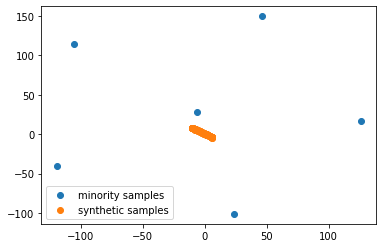

In [11]:
import matplotlib.pyplot as plt

plt.scatter(samples_plot[:,0], samples_plot[:,1])
plt.scatter(synthetic_points_plot[:,0], synthetic_points_plot[:,1])
plt.legend(["minority samples", "synthetic samples"])